In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Imports for better visualization
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [43]:
pd.set_option('max_columns',100)
pd.set_option('max_rows',100)

In [44]:
train = pd.read_excel("Epsilon'20_dataset.xlsx", sheet_name = 'train')
test = pd.read_excel("Epsilon'20_dataset.xlsx", sheet_name = 'test')
train.shape, test.shape

((804, 17), (203, 16))

In [45]:
# Rename the columns 

train = train.rename(columns={'Marital_status ':'Marital_status'})
test = test.rename(columns={'Marital_status ':'Marital_status'})

In [46]:
# Removed the observation in training data which have NaN values in Default columns

train = train.loc[np.where(train['Default'].isnull()==False)].reset_index(drop=True)
train.shape

(803, 17)

In [47]:
train.isnull().sum()

ID                  0
Default             0
Checking_amount     0
Term                1
Credit_score        2
Gender              0
Marital_status      0
Car_loan            1
Personal_loan       2
Home_loan           2
Education_loan      1
Emp_status          0
Amount              0
Saving_amount       0
Emp_duration        3
Age                 0
No_of_credit_acc    1
dtype: int64

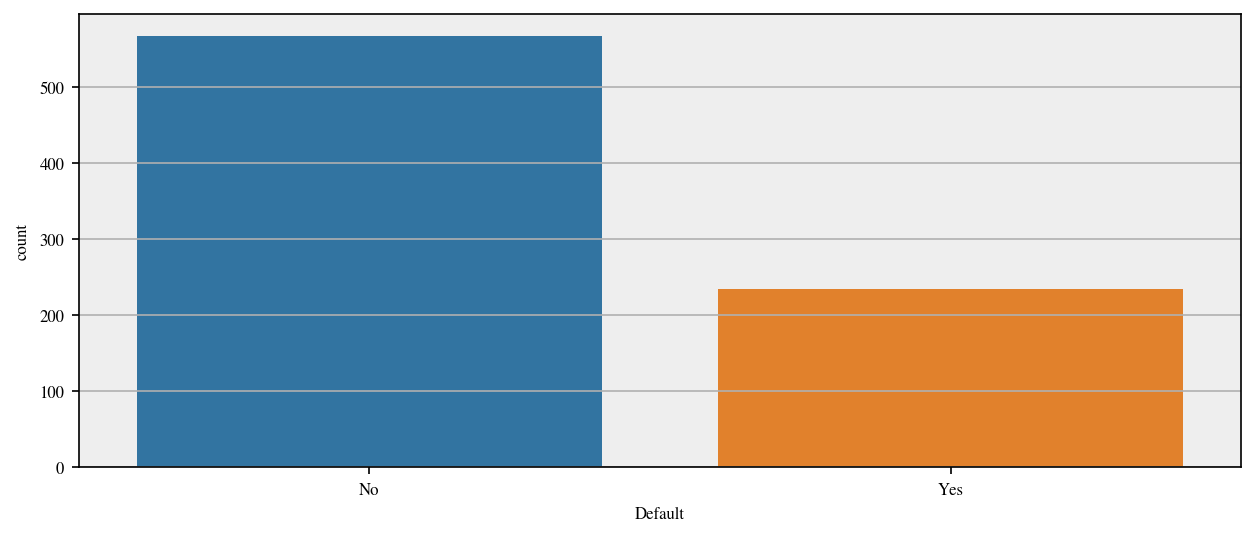

In [48]:
# skewed distribution

sns.countplot(train['Default'])
plt.savefig('target_dist.png')

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Default'] = le.fit_transform(train['Default'])
train['Default'].value_counts()

0    568
1    235
Name: Default, dtype: int64

In [50]:
cat_cols = train.select_dtypes(include='object').columns
num_cols = test.select_dtypes(exclude='object').columns
len(cat_cols), len(num_cols)

(7, 9)

In [51]:
train[cat_cols].isnull().sum()

Gender            0
Marital_status    0
Car_loan          1
Personal_loan     2
Home_loan         2
Education_loan    1
Emp_status        0
dtype: int64

In [52]:
train[cat_cols].head()

,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status
0,Female,Single,Yes,No,No,No,employed
1,Female,Single,Yes,No,No,No,employed
2,Female,Single,No,Yes,No,No,employed
3,Female,Single,No,No,No,Yes,employed
4,Female,Single,No,No,No,Yes,unemployed


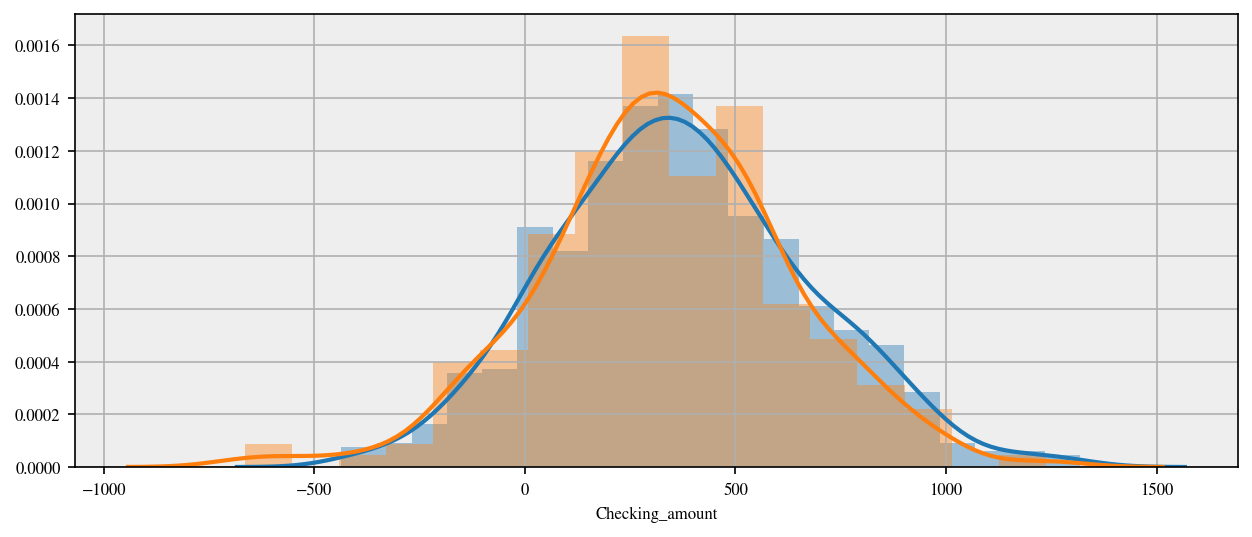

In [53]:
sns.distplot(train['Checking_amount'])
sns.distplot(test['Checking_amount'].dropna())

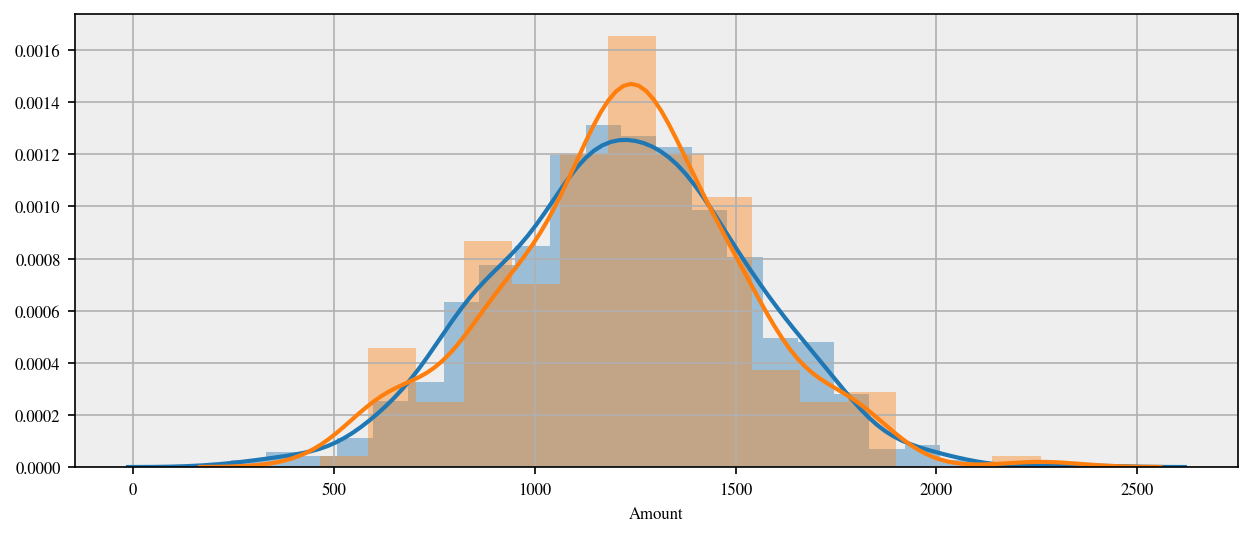

In [54]:
sns.distplot(train['Amount'])
sns.distplot(test['Amount'].dropna())

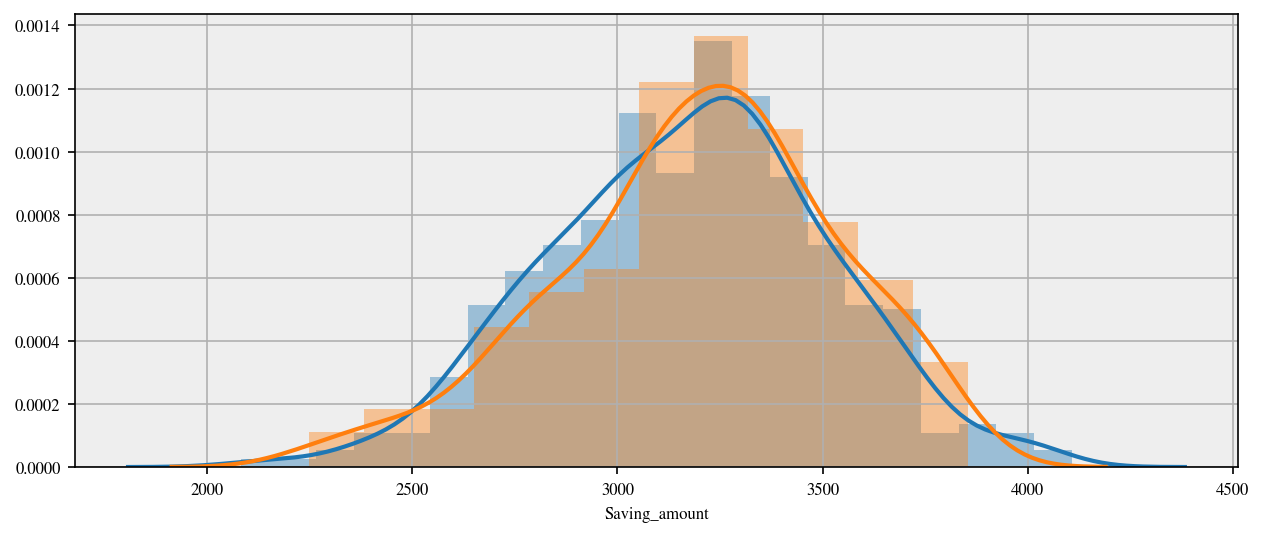

In [55]:
sns.distplot(train['Saving_amount'])
sns.distplot(test['Saving_amount'].dropna())

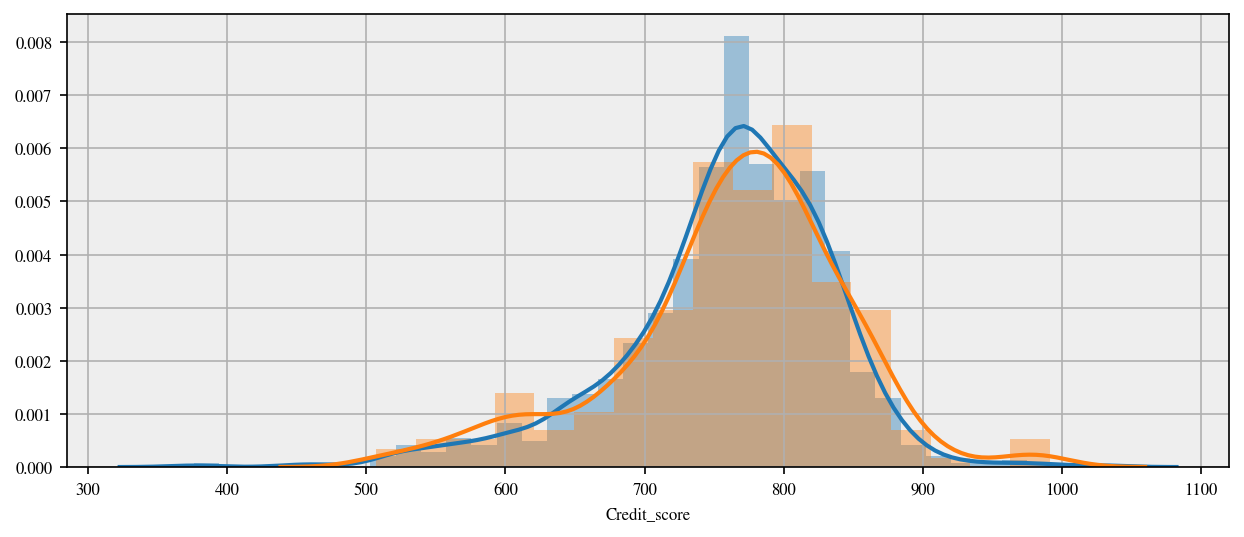

In [56]:
sns.distplot(train['Credit_score'].dropna())
sns.distplot(test['Credit_score'].dropna())

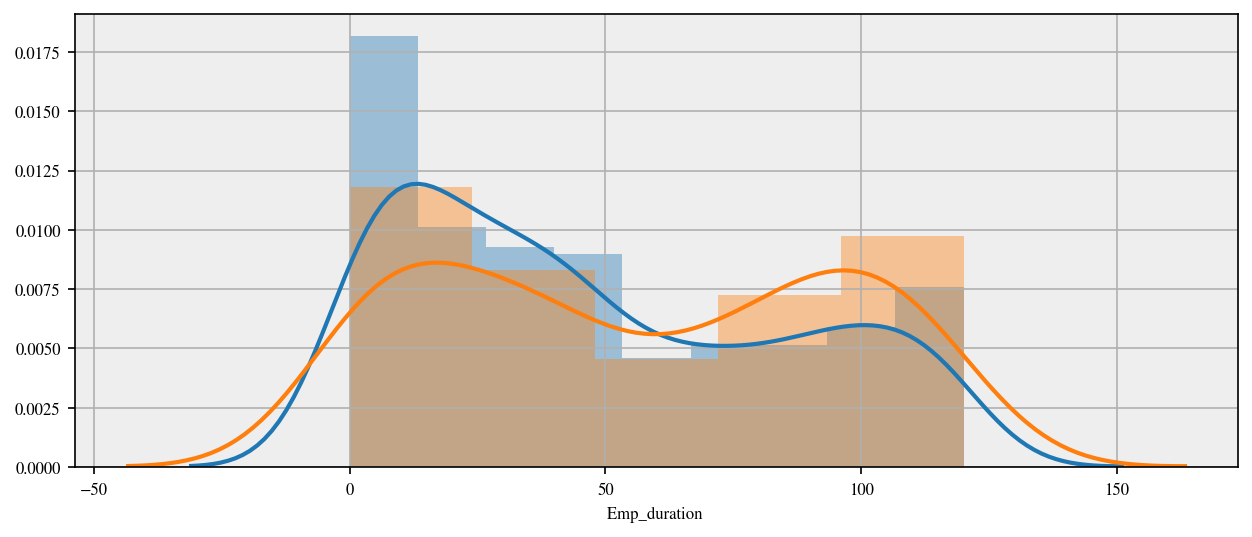

In [57]:
sns.distplot(train['Emp_duration '].dropna())
sns.distplot(test['Emp_duration '].dropna())

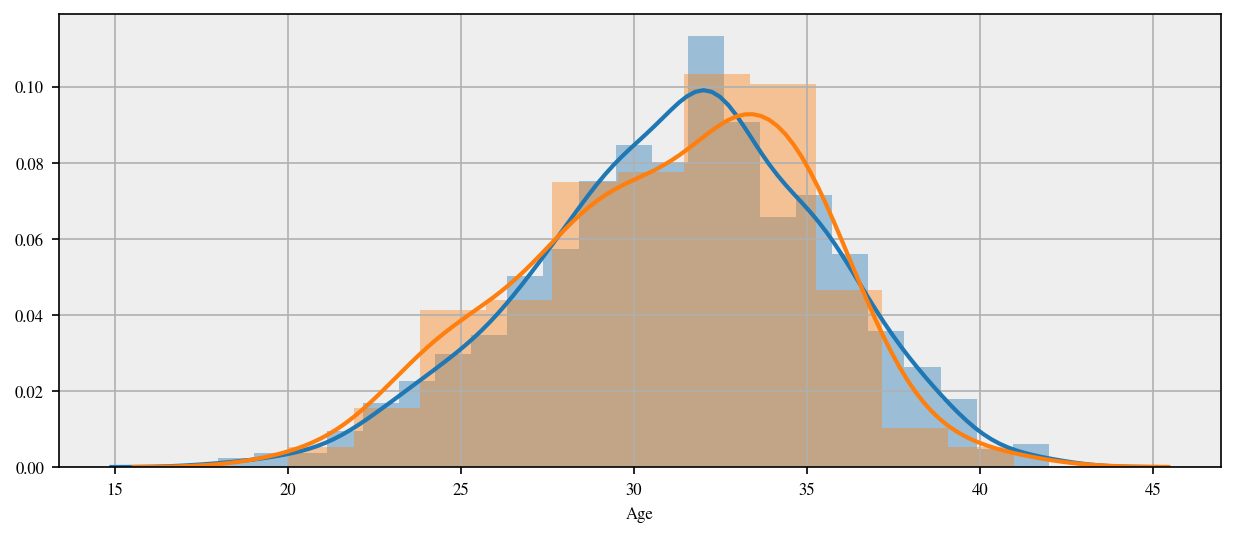

In [58]:
sns.distplot(train['Age'])
sns.distplot(test['Age'].dropna())

In [59]:
default_0 = train[train['Default']==0]
default_1 = train[train['Default']==1]

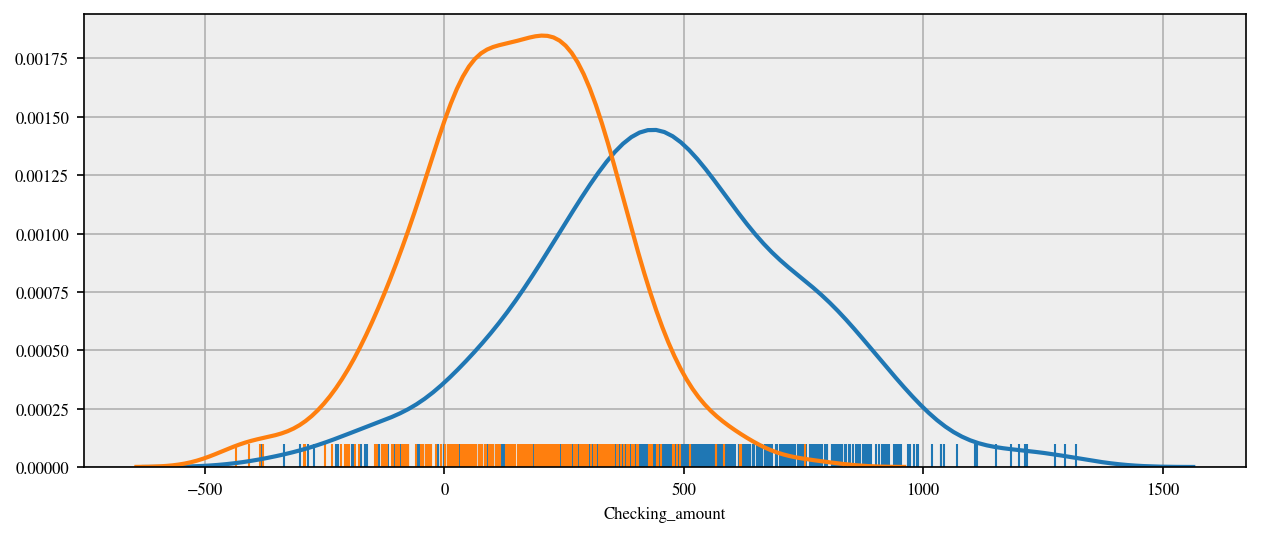

In [60]:
sns.distplot(default_0['Checking_amount'], hist=False, rug=True)
sns.distplot(default_1['Checking_amount'], hist=False, rug=True)

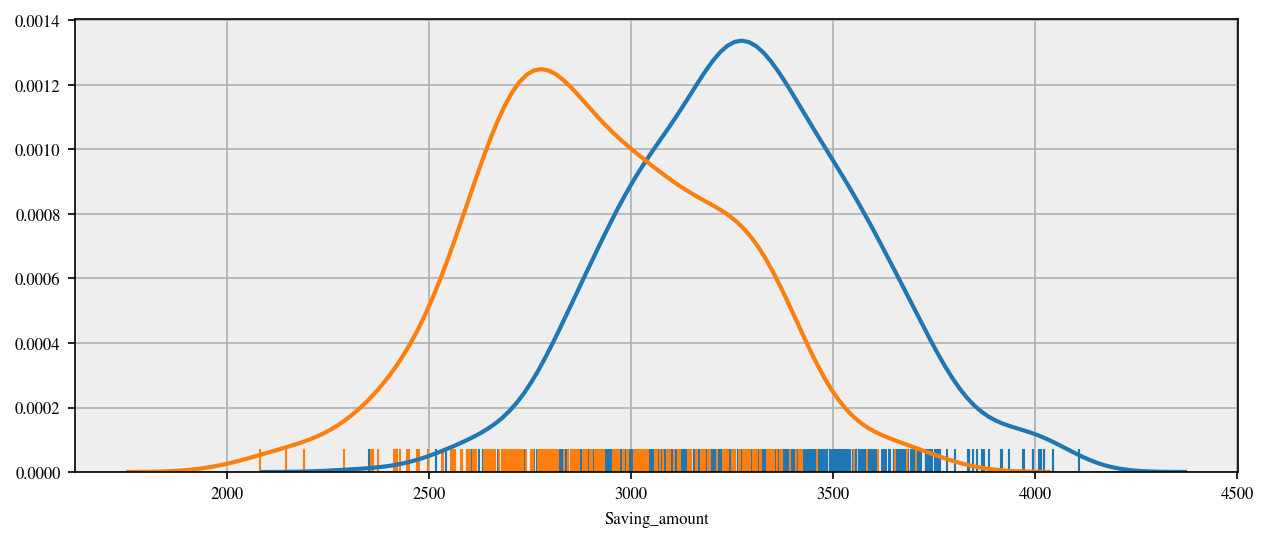

In [61]:
sns.distplot(default_0['Saving_amount'], hist=False, rug=True)
sns.distplot(default_1['Saving_amount'], hist=False, rug=True)

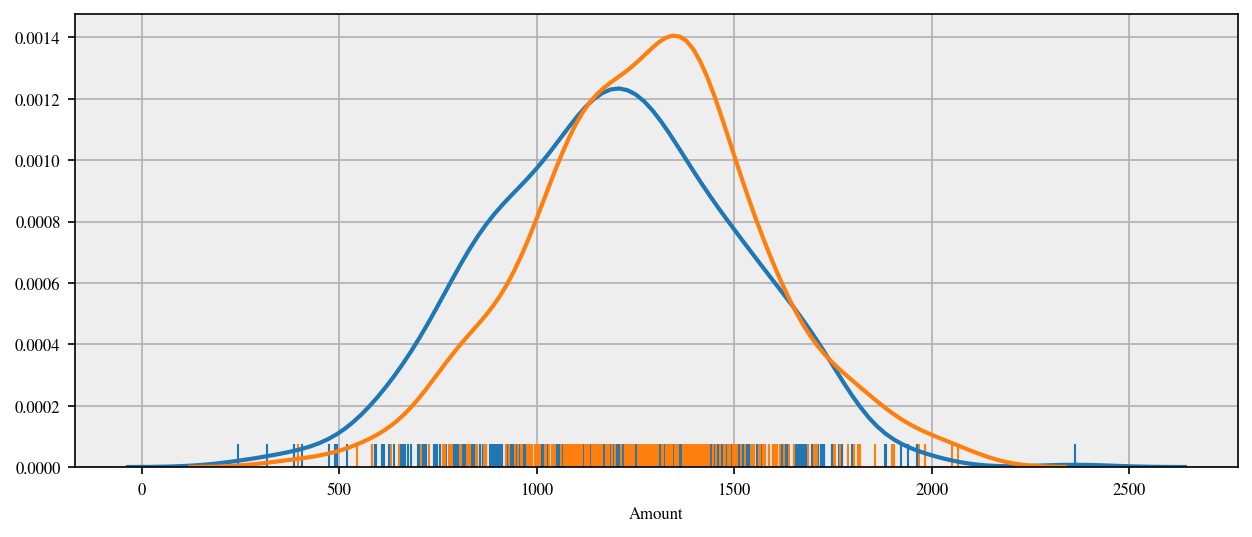

In [62]:
sns.distplot(default_0['Amount'], hist=False, rug=True)
sns.distplot(default_1['Amount'], hist=False, rug=True)

In [67]:
def crosstab_plot(feature,  target, ct):
    stacked = ct.stack().reset_index().rename(columns={0:'Mean_Value'})
    return sns.barplot(x=stacked[feature], y=stacked.Mean_Value, hue=stacked[target])

In [68]:
gender_ct = pd.crosstab(train['Default'], train['Gender'], normalize='index')*100
gender_ct

Gender,Female,Male
Default,,
0,33.274648,66.725352
1,41.276596,58.723404


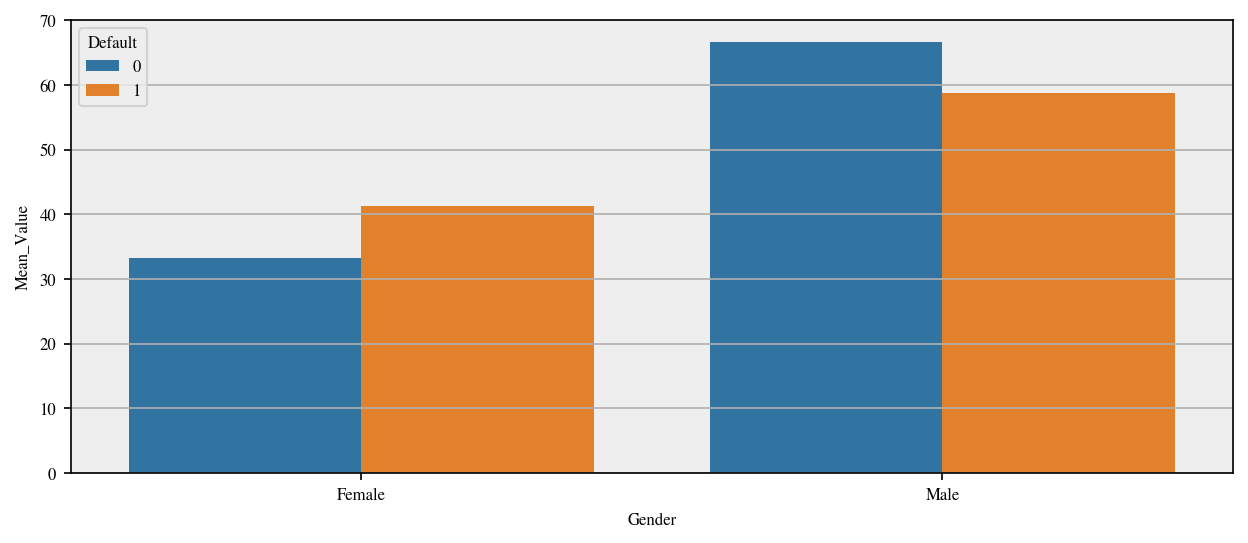

In [71]:
crosstab_plot('Gender', 'Default', gender_ct)
plt.savefig('gender_dist.png')

In [72]:
marital_ct = pd.crosstab(train['Default'], train['Marital_status'], normalize='index')*100
marital_ct

Marital_status,Married,Single
Default,,
0,50.352113,49.647887
1,41.276596,58.723404


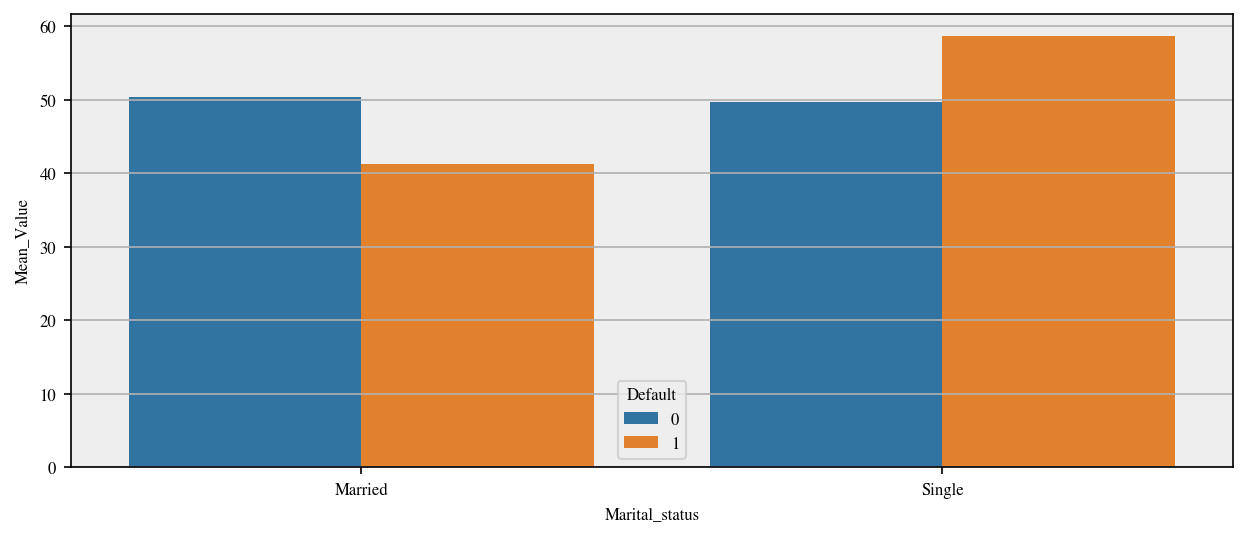

In [73]:
crosstab_plot('Marital_status', 'Default', marital_ct)

In [34]:
car_ct = pd.crosstab(train['Default'], train['Car_loan'], normalize='index')*100
car_ct

Car_loan,No,Yes
Default,,
0,70.899471,29.100529
1,58.723404,41.276596


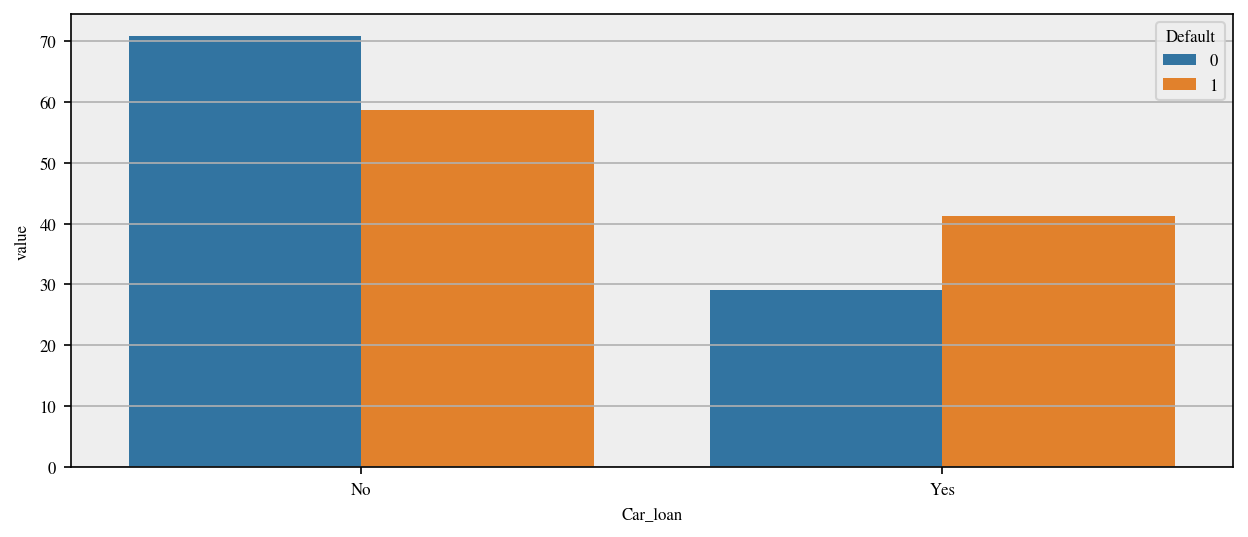

In [35]:
crosstab_plot('Car_loan', 'Default', car_ct)

In [37]:
personal_ct = pd.crosstab(train['Default'], train['Personal_loan'], normalize='index')*100
personal_ct

Personal_loan,No,Yes
Default,,
0,40.812721,59.187279
1,68.936170,31.063830


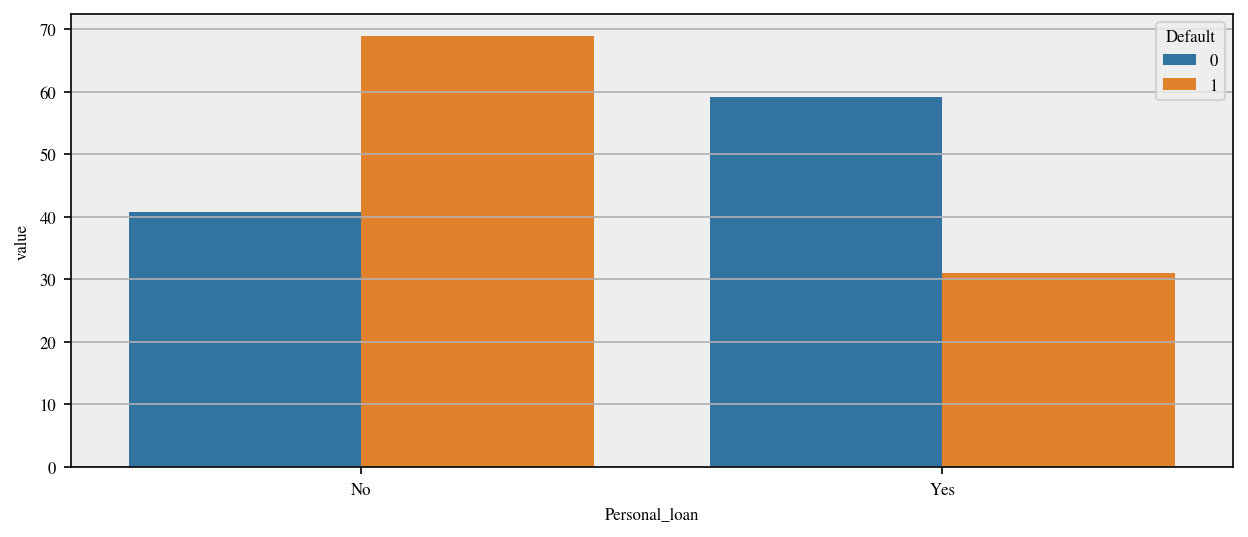

In [39]:
crosstab_plot('Personal_loan', 'Default', personal_ct)

In [41]:
home_ct = pd.crosstab(train['Default'], train['Home_loan'], normalize='index')*100
home_ct

Home_loan,No,Yes
Default,,
0,93.462898,6.537102
1,97.872340,2.127660


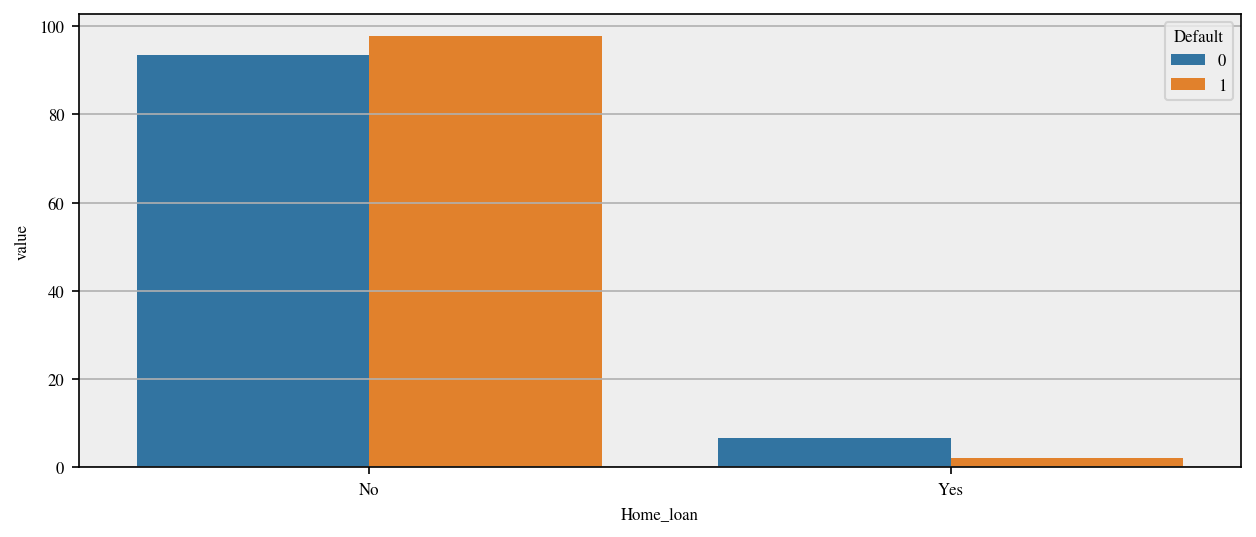

In [45]:
crosstab_plot('Home_loan', 'Default', home_ct)

In [46]:
train['Education_loan'] = train['Education_loan'].replace(['Yes', 'No'], [1, 0])

In [47]:
education_ct = pd.crosstab(train['Default'], train['Education_loan'], normalize='index')*100
education_ct

Education_loan,0.0,1.0
Default,,
0,95.238095,4.761905
1,75.319149,24.680851


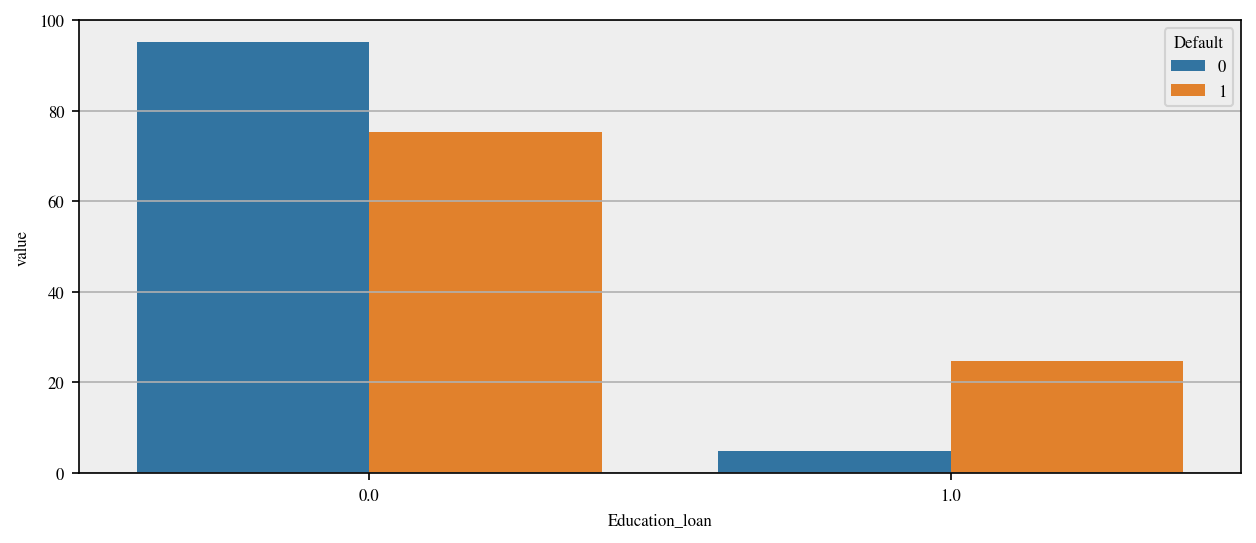

In [48]:
crosstab_plot('Education_loan', 'Default', education_ct)

In [51]:
emp_ct = pd.crosstab(train['Default'], train['Emp_status'], normalize='index')*100
emp_ct

Emp_status,employed,unemployed
Default,,
0,37.676056,62.323944
1,37.021277,62.978723


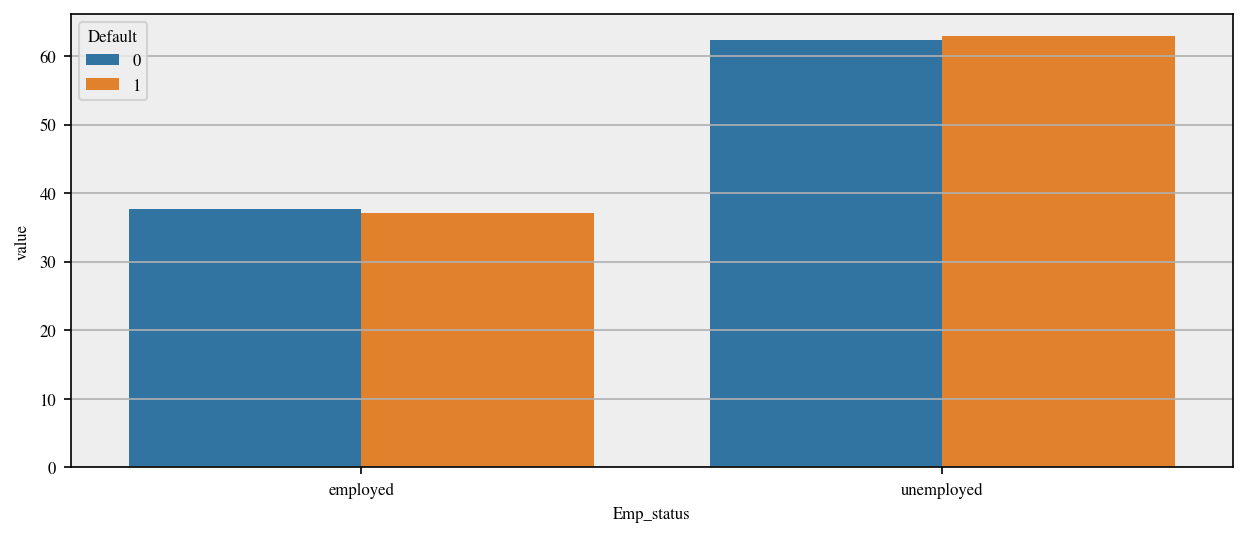

In [52]:
crosstab_plot('Emp_status', 'Default', emp_ct)

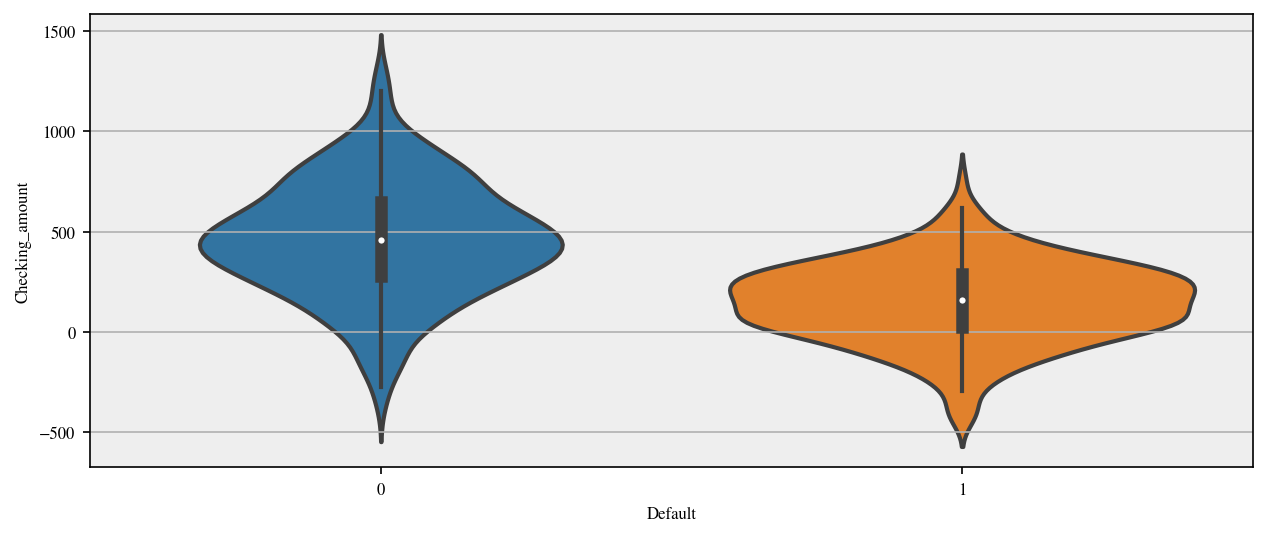

In [56]:
sns.violinplot(train['Default'], train['Checking_amount'])

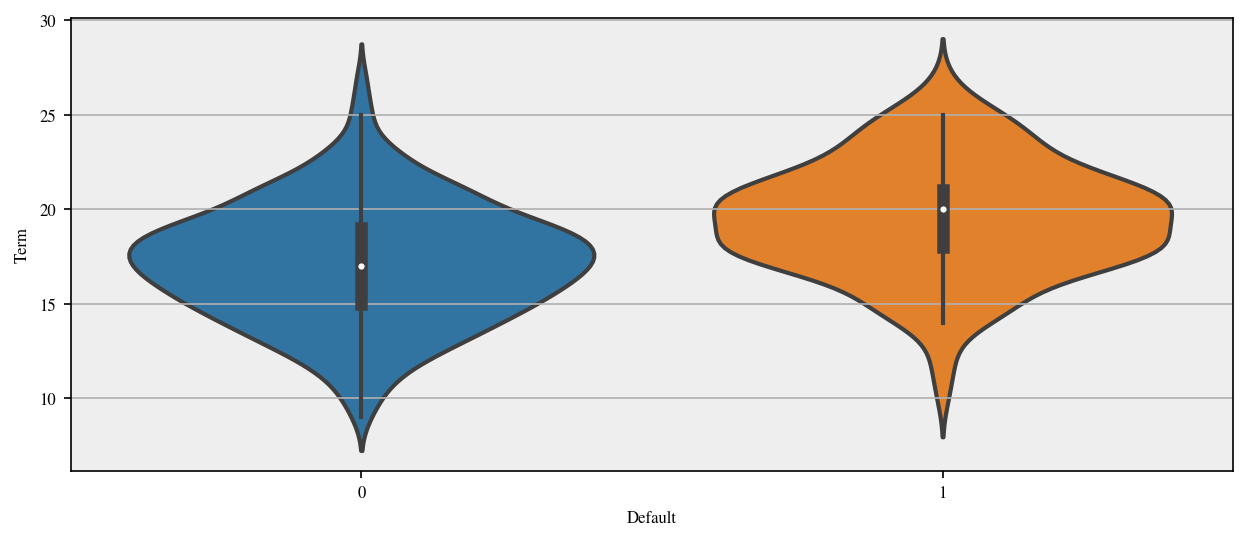

In [59]:
sns.violinplot(train['Default'], train['Term'])

In [74]:
term_ct = pd.crosstab(train['Term'], train['Default'], normalize='index')*100
term_ct

Default,0,1
Term,,
9.0,100.000000,0.000000
10.0,85.714286,14.285714
11.0,90.909091,9.090909
12.0,90.476190,9.523810
13.0,96.969697,3.030303
14.0,87.755102,12.244898
15.0,82.089552,17.910448
16.0,87.671233,12.328767
17.0,74.489796,25.510204


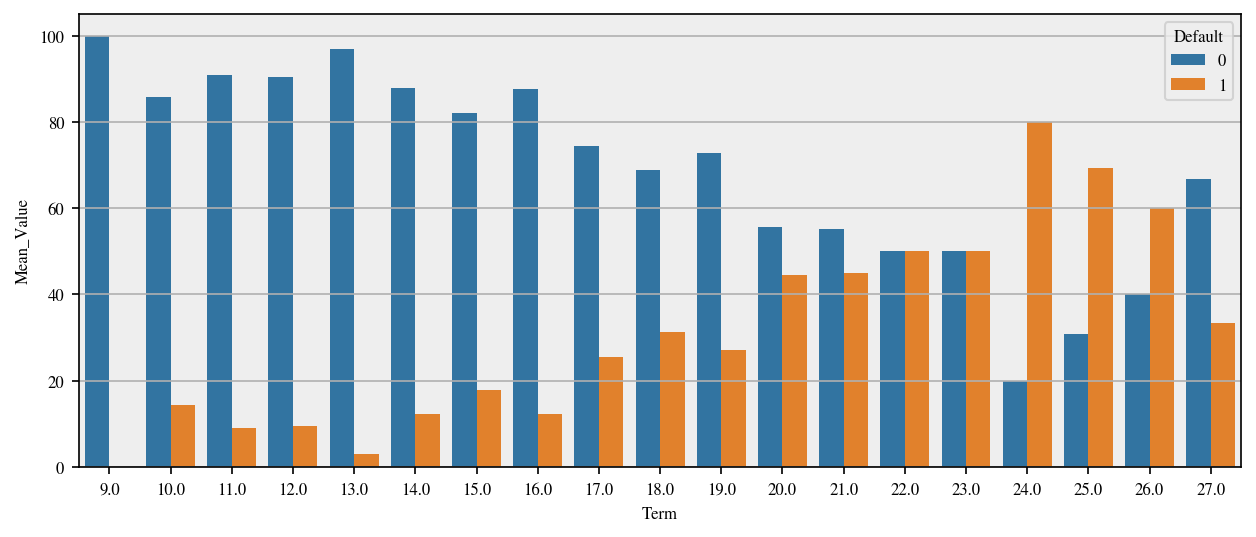

In [76]:
crosstab_plot('Term', 'Default', term_ct)
plt.savefig('Term_dist.png')

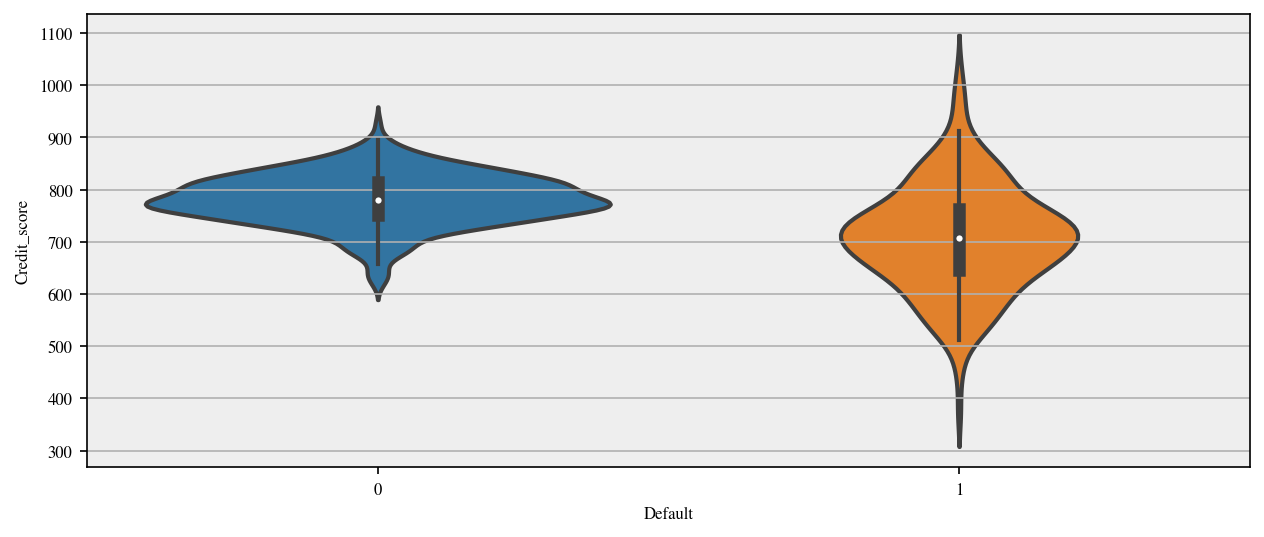

In [67]:
sns.violinplot(train['Default'], train['Credit_score'])

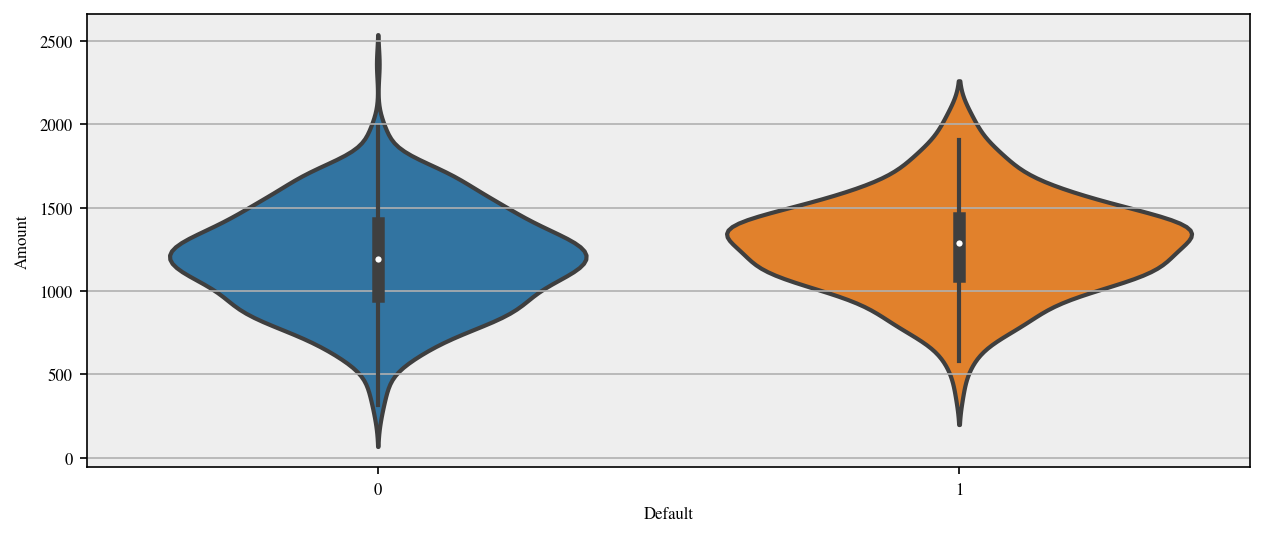

In [70]:
sns.violinplot(train['Default'], train['Amount'])

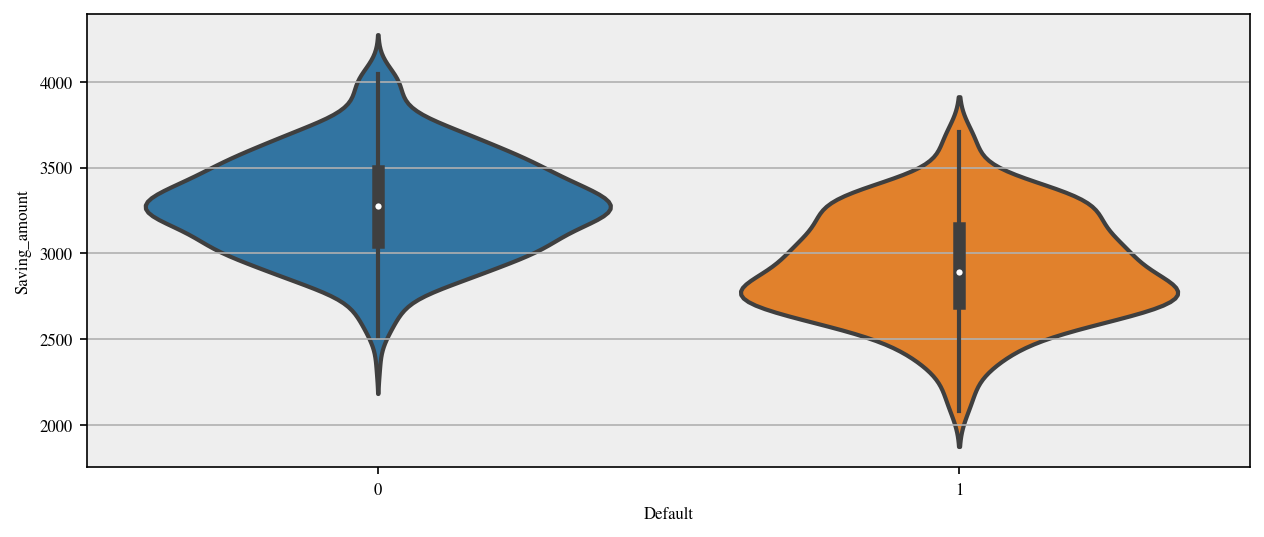

In [72]:
sns.violinplot(train['Default'], train['Saving_amount'])

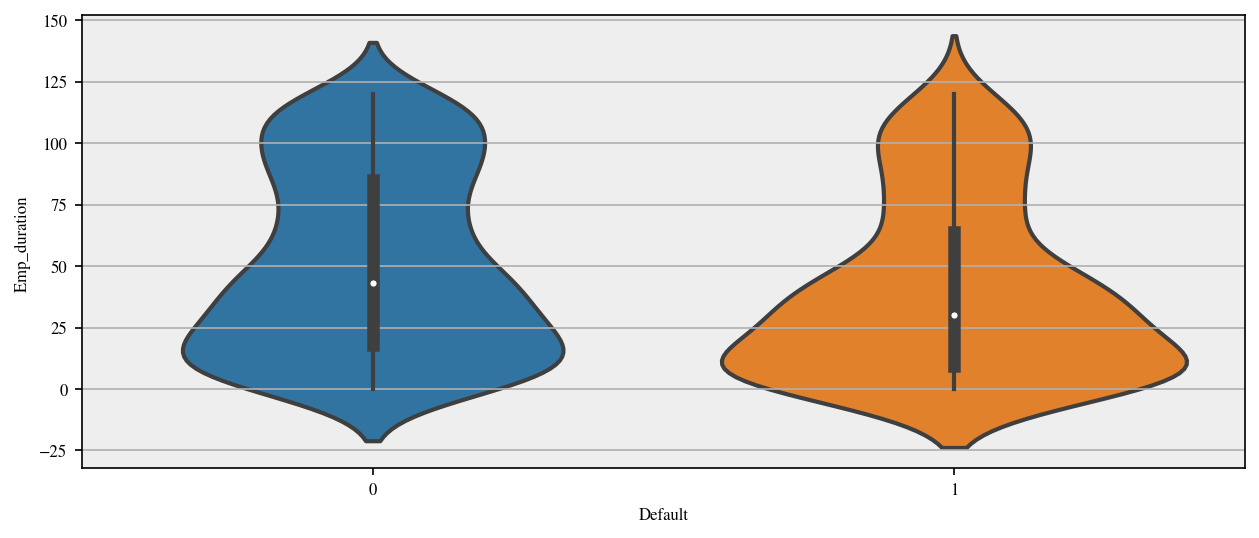

In [76]:
sns.violinplot(train['Default'], train['Emp_duration '])

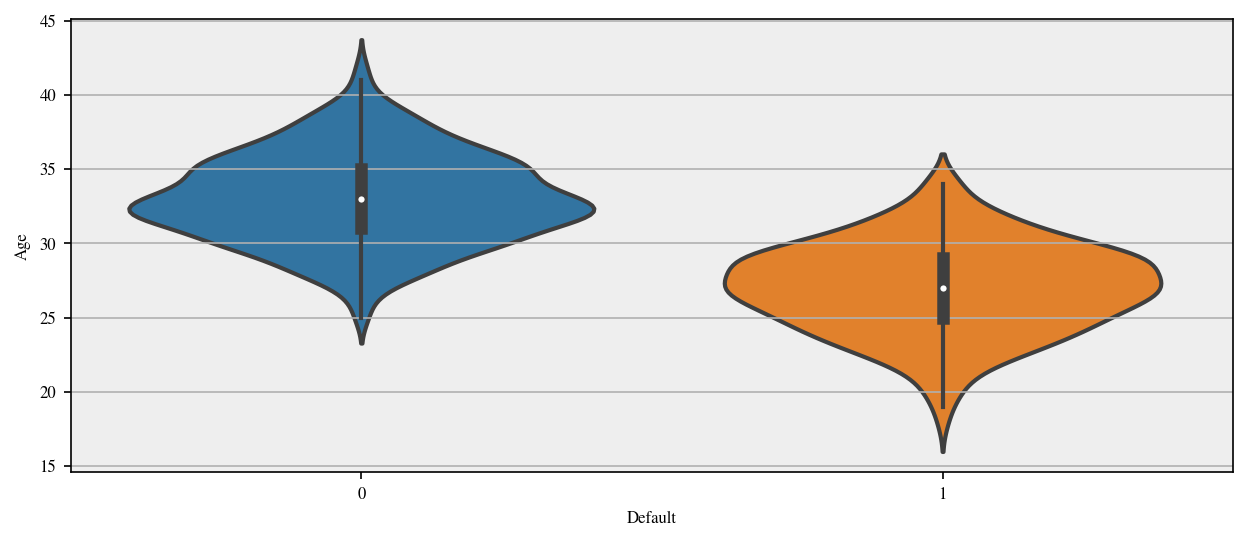

In [81]:
sns.violinplot(train['Default'], train['Age'])

In [77]:
age_ct = pd.crosstab(train['Age'], train['Default'], normalize='index')*100
age_ct

Default,0,1
Age,,
18.0,0.000000,100.000000
19.0,0.000000,100.000000
20.0,0.000000,100.000000
21.0,0.000000,100.000000
22.0,0.000000,100.000000
23.0,0.000000,100.000000
24.0,0.000000,100.000000
25.0,12.000000,88.000000
26.0,10.344828,89.655172


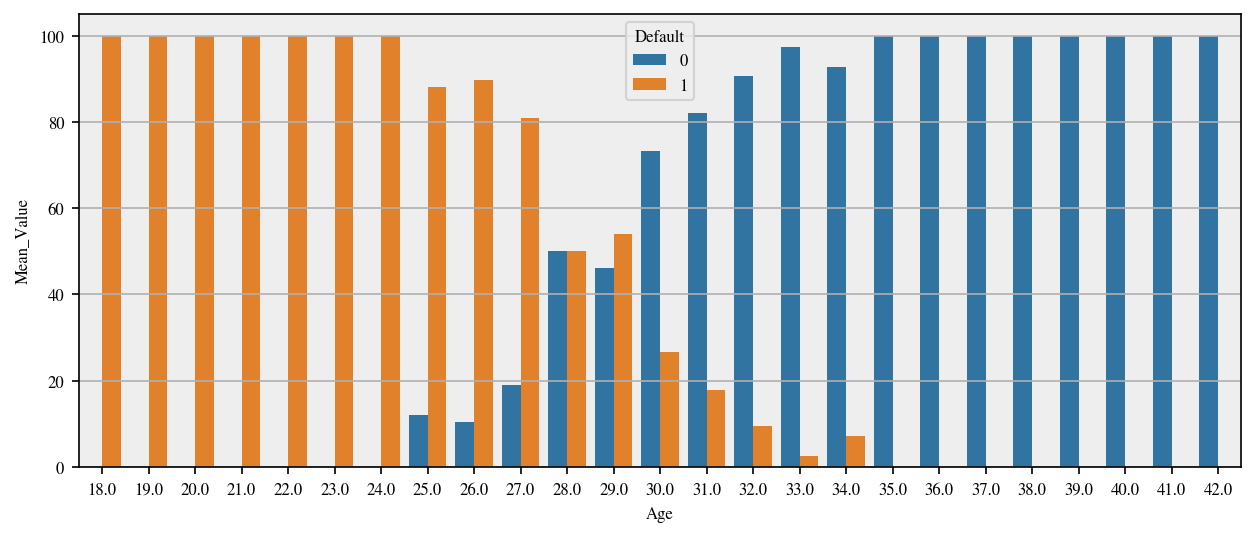

In [78]:
crosstab_plot('Age', 'Default', age_ct)
plt.savefig('Age_dist.png')

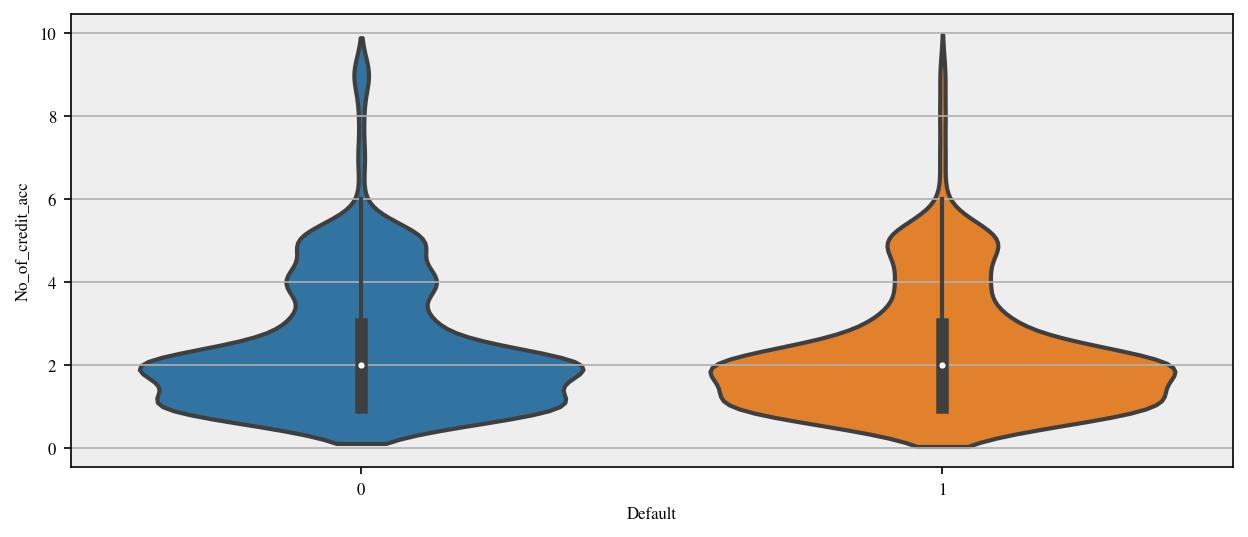

In [90]:
sns.violinplot(train['Default'], train['No_of_credit_acc'])

In [79]:
acc_ct = pd.crosstab(train['No_of_credit_acc'], train['Default'], normalize='index')*100
acc_ct

Default,0,1
No_of_credit_acc,,
1.0,68.582375,31.417625
2.0,69.122807,30.877193
3.0,70.886076,29.113924
4.0,80.246914,19.753086
5.0,71.794872,28.205128
6.0,66.666667,33.333333
7.0,75.000000,25.000000
8.0,66.666667,33.333333
9.0,87.500000,12.500000


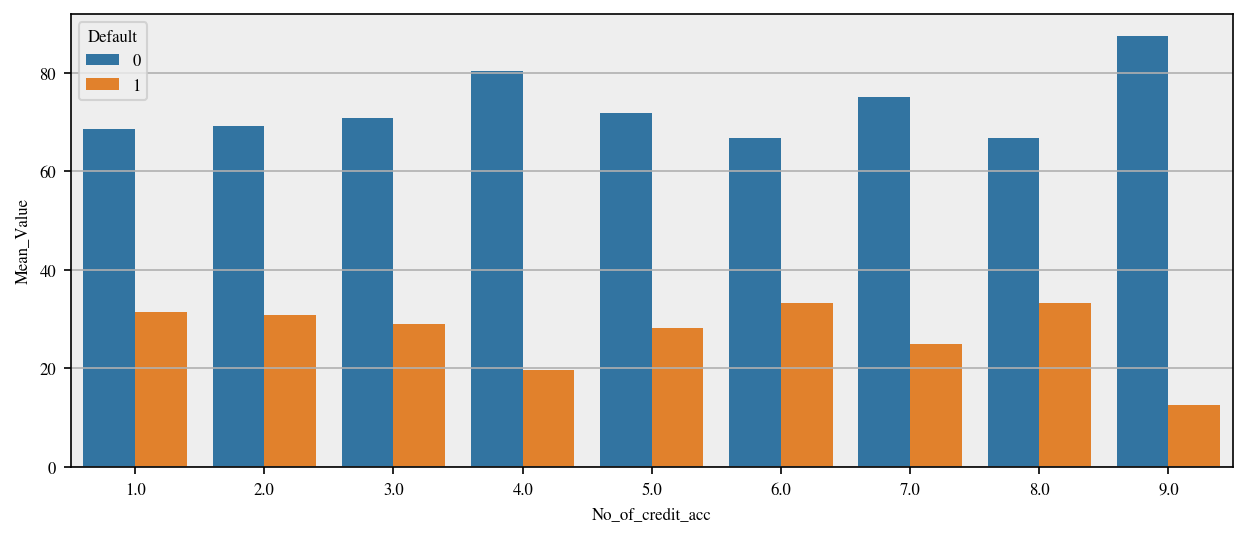

In [80]:
crosstab_plot('No_of_credit_acc', 'Default', acc_ct)